In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [221]:
import sklearn

In [222]:
data=pd.read_csv('Position_Salaries.csv')

In [223]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [224]:
data.drop(['Position'],1, inplace= True)

In [225]:
data.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [226]:
x=data.iloc[:,0:1].values
y=data.iloc[:,1:2].values

In [227]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [228]:
poly_reg=PolynomialFeatures(degree=3)

In [229]:
x_new=poly_reg.fit_transform(x)

In [230]:
poly_reg.fit(x_new,y)
lin_reg=LinearRegression()
lin_reg.fit(x_new,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

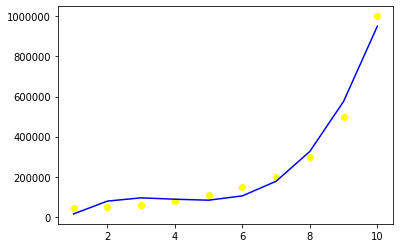

In [231]:
plt.scatter(x,y, color='yellow')
plt.plot(x,lin_reg.predict(x_new), color='blue')

In [188]:
from sklearn.preprocessing import StandardScaler

In [189]:
sc_x=StandardScaler()
sc_y=StandardScaler()

In [190]:
x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y)

In [191]:
from sklearn.svm import SVR

In [192]:
reg=SVR(kernel='rbf')

In [193]:
reg.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

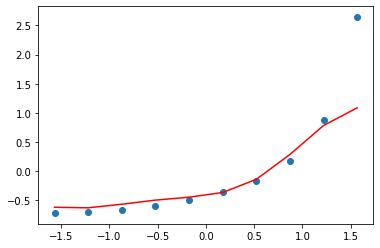

In [194]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x), color='red')

In [195]:
sc_y.inverse_transform(reg.predict(np.array([[6.5]])))

array([252789.13921624])

In [232]:
from sklearn.tree import DecisionTreeRegressor

In [233]:
reg=DecisionTreeRegressor(max_features=1)

In [234]:
reg.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=1,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

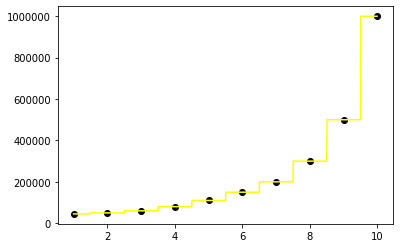

In [249]:
x_grid=np.arange(min(x), max(x), 0.01)
x_grid=x_grid.reshape(len(x_grid),1)
plt.scatter(x,y,color='black')
plt.plot(x_grid,reg.predict(x_grid), color='yellow')
plt.show()